
---

## **Module 5 : Logistic Regression**
### **1. Understanding the Cost Function for Logistic Regression**

- **Cost Function in Linear Regression** 
  In linear regression, the cost function measures how well the model's predictions match the actual data. It is typically the Mean Squared Error (MSE), calculated as:
  $$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $$
  This function penalizes larger errors more, and the goal is to minimize it.
  - ![Cost_Function](./Images/C_fun.png)

- **Cost Function in Logistic Regression** 
  Unlike linear regression, logistic regression uses a **sigmoid function** to predict probabilities for binary outcomes (0 or 1). The cost function here is **Log Loss** or **Binary Cross-Entropy**, which penalizes incorrect predictions. The formula is:
  $$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))\right] $$
  The goal is to minimize this log loss function during training.
  - ![Cost_Function1](./Images/C_fun2.png)

- **Final Cost Function** 
  The final cost function for logistic regression is the cross-entropy loss, and the gradient descent algorithm is used to minimize it.
  - ![Final_Cost_Function](./Images/C_fun3.png)

- **Gradient Descent** 
  This optimization algorithm helps minimize the cost function by updating the model parameters iteratively. At each step, the parameters (weights and biases) are updated in the direction that reduces the cost.
  - ![Gradient Descent](./Images/C_fun4.png)

---

### **2. Implementation of Logistic Regression using sklearn in Python**
#### **Importing Libraries**  
- **matplotlib.pyplot** and **seaborn** These libraries are used for data visualization.
- **LogisticRegression** This is the logistic regression class in scikit-learn.
- **classification_report** and **accuracy_score** These are used for evaluating the model's performance.
- **train_test_split** Splits the dataset into training and testing sets.

#### **Dataset Preparation and Visualization**  
- The **Iris dataset** is loaded, and features (X) and the target variable (Y) are split.
- **Scatter plots** are created to visualize the relationship between features and species.

#### **Model Creation, Training, and Evaluation**  
- The logistic regression model is created using the **LogisticRegression()** function and is trained using the training data.
- After testing the model, predictions are made using the **predict()** function.
- **Accuracy**, **precision**, **recall**, **F1-score**, and other metrics are evaluated using **classification_report()** and **accuracy_score()**.

---

#### **Import the Libraries**

In [20]:
import matplotlib.pyplot as plt  # matplotlib.pyplot for creating plots.
import seaborn as sns # seaborn for enhanced data visualization.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report # for performing logistic regression.
from sklearn.metrics import accuracy_score #  for evaluating model performance.
from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing sets.

#### **Load the iris Dataset**

In [21]:
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### **Prepare training data for building the model**
- This code is used for splitting a dataset into features (X) and the target variable (Y). The first line assigns to X all the rows and columns of data except the last column, which usually represents the features of the dataset. The second line assigns to Y all the rows of the last column of data, typically the target variable.

In [22]:
X = data.iloc[:, :-1]  # Selects all rows and all columns except the last one.
Y = data.iloc[:, -1]   # Selects all rows but only the last column.


#### **Plot the relation of each feature with each species** 

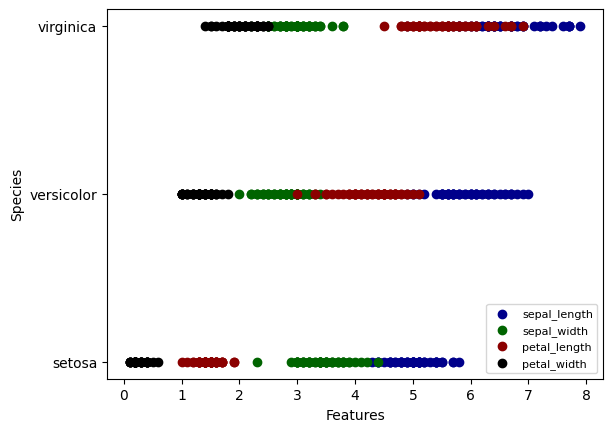

In [23]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = data.loc[:, 'sepal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='darkblue', label='sepal_length')

pltX = data.loc[:, 'sepal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='darkgreen', label='sepal_width')

pltX = data.loc[:, 'petal_length']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='darkred', label='petal_length')

pltX = data.loc[:, 'petal_width']
pltY = data.loc[:, 'species']
plt.scatter(pltX, pltY, color='black', label='petal_width')

plt.legend(loc=4, prop={'size':8})

plt.show()

#### **Split the dataset**

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

#### **Create and train the Logistic Regression** 

In [25]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

#### **Test the model**

In [26]:
predictions = model.predict(x_test)
print(predictions)

['setosa' 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'setosa' 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa']


#### **Check precision, recall, f1-score, Support**

In [27]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [28]:
print(accuracy_score(y_test,predictions))

1.0



---
### **3. Implementation of Logistic Regression without using sklearn in Python**
#### **Sigmoid Function**
- **Sigmoid Function** 
  The sigmoid function maps any real-valued number into the range [0,1]. It is used in logistic regression to convert the raw model output into a probability.
  $$\sigma(z) = \frac{1}{1 + e^{-z}}$$

#### **Loss Function** 
- **Square Loss Function** 
  This loss function calculates the error between predicted values (**y_pred**) and actual values (**target**). It is used here for simplicity, though cross-entropy is more common in logistic regression. The formula is:
  $$L = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{pred}} - y_{\text{target}})^2 $$

#### **Gradient Descent**  
- **Gradient Descent Algorithm** 
  It helps minimize the loss function by iteratively updating weights (**w**) and bias (**b**). The gradients of the loss with respect to **w** and **b** are computed and updated using a learning rate (**lr**):
  - **Gradient of w** Measures the change in loss with respect to changes in the weight **w**.
    $$\text{gradient\_w} = \frac{1}{m} \sum (y_{\text{pred}} - y_{\text{train}}) \cdot X_{\text{train}}$$
  - **Gradient of b** Measures the change in loss with respect to changes in the bias **b**.
    $$\text{gradient\_b} = \frac{1}{m} \sum (y_{\text{pred}} - y_{\text{train}})$$

- **Weight and Bias Update** 
  After calculating the gradients, we update the weights and biases as follows
  $$w = w - \text{lr} \cdot \text{gradient\_w}$$
  $$b = b - \text{lr} \cdot \text{gradient\_b}$$
  - ![Formula](./Images/formula.png)

#### **Prediction**  
- After training the model using gradient descent, predictions are made on the test set by passing the input through the learned sigmoid function.
---

### **Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import random 

### **Dataframe creation**

In [2]:
df = pd.DataFrame({"age":[22,25,36,40,18,15,50,70,55,30], "bought": [0,0,1,1,0,1,0,0,1,1]})

### **Splitting  the dataset**
- The code snippet randomly selects 3 rows from the DataFrame **df** as the test set. It then creates the train set by excluding these rows from **df** and removes any rows with **NaN** values from the train set to make sure it is clean for further analysis.

In [3]:
test = df.sample(3) #r
train = df[~df.isin(test)]
train.dropna(inplace=True)

### **Activation function**

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

### **Loss function**


In [5]:
def square_loss(y_pred, target):
    return np.mean(pow((y_pred-target),2))

### **Splitting into X and Y parts**

In [6]:
X_train, y_train = train.age, train['bought']
X_test, y_test = test.age, test['bought']

### **Model Setup and running**
- The code snippet implements a gradient descent algorithm for training a logistic regression model. It initializes weights **w** and bias **b**, computes predictions **y_pred** using the sigmoid function on the linear combination of inputs **X_train** and **w**, and evaluates the loss using the square loss function. It then updates **w** and **b** by computing gradients of the loss with respect to these parameters and adjusting them using a learning rate **lr** over 1000 iterations to minimize the loss.

In [7]:
lr = 0.01
w = np.random.uniform(0,1)
b = 0.1

for i in range(1000):
    z = np.dot(X_train,w)+b

y_pred = sigmoid(z)

l = square_loss(y_pred, y_train)

gradient_w = np.dot((y_pred-y_train).T, X_train)/X_train.shape[0]
gradient_b = np.mean(y_pred-y_train)

w = w - lr * gradient_w
b = b - lr * gradient_b

### **Predict on the test set**

In [8]:
for i in range(len(X_test)): # r
    r = sigmoid(np.dot(X_test,w)+b)
r

array([0.99483788, 0.99993009, 0.99907429])

In [10]:
y_test

9    1
8    1
3    1
Name: bought, dtype: int64